# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score, root_mean_squared_error

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from pprint import pprint

# Import Random Forest Regressor and Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Import KNeighbors Regressor and Classifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# Import Gradient Boosting Regressor and Classifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Import K-means for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# Import time
import time

# Import Randomized Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Import kfold
from sklearn.model_selection import KFold

# Import cross val score
from sklearn.model_selection import cross_val_score

# Import math
import math

# Import log2
from math import log2

# Import classification report
from sklearn.metrics import classification_report

# Import silhouette_score for clustering evaluation
from sklearn.metrics import silhouette_score

# Import pickle
import pickle

np.random.seed(42)

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
path = 'data/'
convabuse_mlma_filename = 'convabuse_mlma_merged.csv'
pickle_path = 'pickle/'

In [3]:
# Import the datasets
convabuse_mlma = pd.read_csv(f'{path}{convabuse_mlma_filename}')
convabuse_mlma_sample = convabuse_mlma.sample(frac=0.1, random_state=42)

In [4]:
convabuse_mlma.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
convabuse_mlma_X = convabuse_mlma.drop("abuse_level", axis=1)
convabuse_mlma_y = convabuse_mlma["abuse_level"]

In [6]:
convabuse_mlma_X_sample = convabuse_mlma_sample.drop("abuse_level", axis=1)
convabuse_mlma_y_sample = convabuse_mlma_sample["abuse_level"]

In [7]:
# Implement KFold
convabuse_mlma_kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear Modeling

In [8]:
# Get only the numeric features for each dataset
convabuse_mlma_X_numeric = convabuse_mlma_X.select_dtypes(include=np.number)
convabuse_mlma_X_sample_numeric = convabuse_mlma_X_sample.select_dtypes(include=np.number)

In [9]:
# Use standard scaler on the Convabuse MLMA X data
convabuse_mlma_scaler = StandardScaler()
convabuse_mlma_X_scaled = convabuse_mlma_scaler.fit_transform(convabuse_mlma_X_numeric)
convabuse_mlma_X_scaled = pd.DataFrame(convabuse_mlma_X_scaled, columns=convabuse_mlma_X_numeric.columns)

In [10]:
# Use standard scaler on the Convabuse MLMA X sample data
convabuse_mlma_scaler = StandardScaler()
convabuse_mlma_X_sample_scaled = convabuse_mlma_scaler.fit_transform(convabuse_mlma_X_sample_numeric)
convabuse_mlma_X_sample_scaled = pd.DataFrame(convabuse_mlma_X_sample_scaled, columns=convabuse_mlma_X_sample_numeric.columns)

In [11]:
for columns in [convabuse_mlma_X_numeric.columns]:
  print(columns)

Index(['race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')


In [12]:
# Train test split for each dataset
convabuse_mlma_X_train, convabuse_mlma_X_test, convabuse_mlma_y_train, convabuse_mlma_y_test = train_test_split(convabuse_mlma_X_scaled, convabuse_mlma_y, test_size=0.2, random_state=42)
convabuse_mlma_X_sample_train, convabuse_mlma_X_sample_test, convabuse_mlma_y_sample_train, convabuse_mlma_y_sample_test = train_test_split(convabuse_mlma_X_sample_scaled, convabuse_mlma_y_sample, test_size=0.2, random_state=42)

In [13]:
# Get the length of each dataset
convabuse_mlma_length = len(convabuse_mlma_X_train)
convabuse_mlma_sample_length = len(convabuse_mlma_X_sample_train)

In [14]:
convabuse_mlma_log2 = math.ceil(log2(convabuse_mlma_length))
convabuse_mlma_1_percent = math.ceil(convabuse_mlma_length * 0.01)
convabuse_mlma_length, convabuse_mlma_log2, convabuse_mlma_1_percent

(82956, 17, 830)

In [15]:
convabuse_mlma_sample_log2 = math.ceil(log2(convabuse_mlma_sample_length))
convabuse_mlma_sample_1_percent = math.ceil(convabuse_mlma_sample_length * 0.01)
convabuse_mlma_sample_length, convabuse_mlma_sample_log2, convabuse_mlma_sample_1_percent

(8296, 14, 83)

In [16]:
rf_classification_results_list = []

In [17]:
knn_classification_results_list = []

## Convabuse MLMA Decision Tree

In [18]:
convabuse_mlma_y_test.value_counts()

abuse_level
3    4750
0    4726
4    4638
2    4626
1    2000
Name: count, dtype: int64

In [19]:
convabuse_mlma_1_percent

830

In [20]:
# Random Forest Classifier pipeline for Convabuse MLMA dataset
convabuse_mlma_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the Convabuse MLMA dataset
convabuse_mlma_rf_param_grid = {
    'rf_classifier__n_estimators': range(1000),
    'rf_classifier__max_depth': range(1, convabuse_mlma_log2),
    'rf_classifier__min_samples_split': [convabuse_mlma_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [convabuse_mlma_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini']
}

In [21]:
start_time = time.time()
convabuse_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

convabuse_mlma_rf_random_search = RandomizedSearchCV(convabuse_mlma_rf_pipeline,
                                                   param_distributions=convabuse_mlma_rf_param_grid,
                                                   n_iter=10,
                                                   cv=convabuse_mlma_kf,
                                                   scoring=convabuse_class_scorer,
                                                   random_state=42)
convabuse_mlma_rf_random_search.fit(convabuse_mlma_X_train, convabuse_mlma_y_train)
end_time = time.time()
print("Best parameters for Convabuse MLMA Random Forest Classifier:", convabuse_mlma_rf_random_search.best_params_)
print("Best score for Convabuse MLMA Random Forest Classifier:", convabuse_mlma_rf_random_search.best_score_)
print("Time taken for Convabuse MLMA Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for Convabuse MLMA Random Forest Classifier: {'rf_classifier__n_estimators': 958, 'rf_classifier__min_samples_split': 2490, 'rf_classifier__min_samples_leaf': 830, 'rf_classifier__max_depth': 7, 'rf_classifier__criterion': 'gini'}
Best score for Convabuse MLMA Random Forest Classifier: 0.32165242980372943
Time taken for Convabuse MLMA Random Forest Classifier Randomized Search: 171.0692949295044


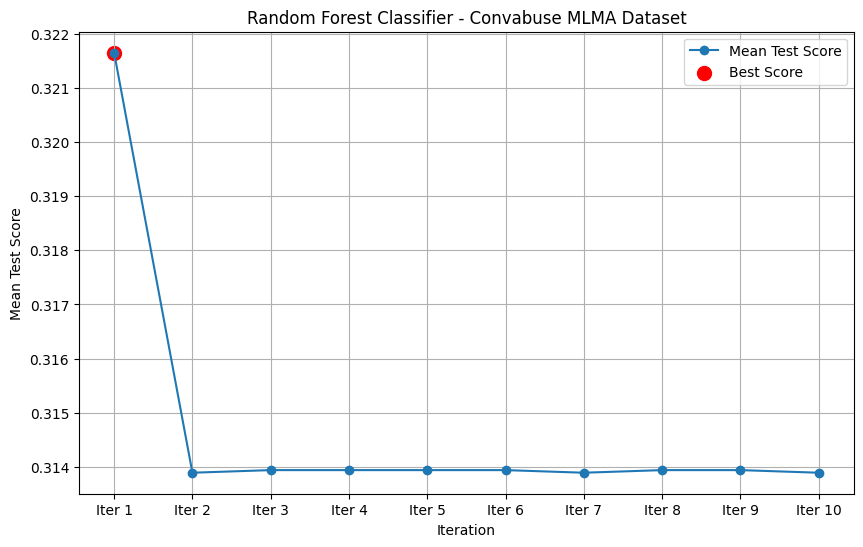

In [22]:
# Plot the accuracy scores for the Random Forest Classifier on the US Accidents dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(convabuse_mlma_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
convabuse_mlma_rf_best_score_index = np.argmax(convabuse_mlma_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(convabuse_mlma_rf_best_score_index, convabuse_mlma_rf_random_search.cv_results_['mean_test_score'][convabuse_mlma_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - Convabuse MLMA Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(convabuse_mlma_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(convabuse_mlma_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [23]:
# Predict on the test set
convabuse_mlma_rf_y_pred = convabuse_mlma_rf_random_search.predict(convabuse_mlma_X_test)

In [24]:
# Evaluate the model
convabuse_mlma_rf_accuracy = accuracy_score(convabuse_mlma_y_test, convabuse_mlma_rf_y_pred)
convabuse_mlma_rf_f1 = f1_score(convabuse_mlma_y_test, convabuse_mlma_rf_y_pred, average='weighted')

print("Convabuse MLMA Random Forest Classifier:")
print(f"Best Parameters: {convabuse_mlma_rf_random_search.best_params_}")
print(f"Accuracy: {convabuse_mlma_rf_accuracy:.4f}")
print(f"F1 Score: {convabuse_mlma_rf_f1:.4f}")

Convabuse MLMA Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 958, 'rf_classifier__min_samples_split': 2490, 'rf_classifier__min_samples_leaf': 830, 'rf_classifier__max_depth': 7, 'rf_classifier__criterion': 'gini'}
Accuracy: 0.3176
F1 Score: 0.2867


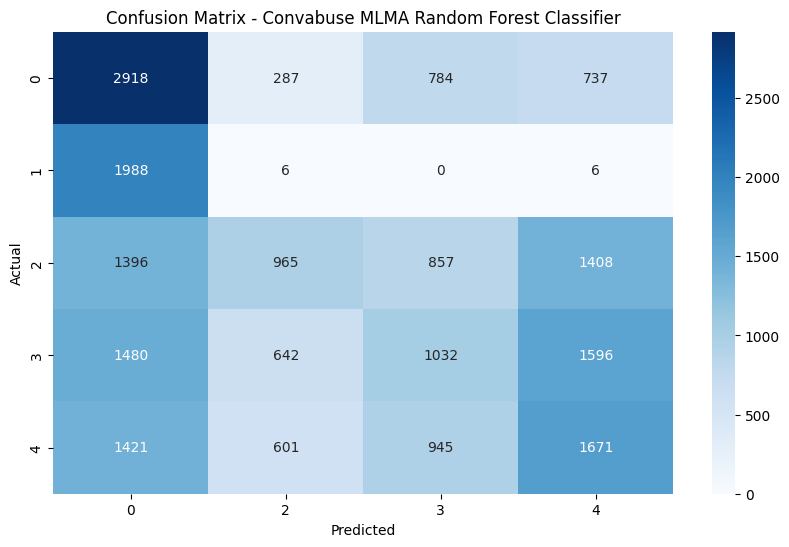

In [25]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_mlma_y_test, convabuse_mlma_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Convabuse MLMA Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
# Generate a classification report for the Random Forest Classifier on the Convabuse MLMA dataset
convabuse_rf_report = classification_report(convabuse_mlma_y_test, convabuse_mlma_rf_y_pred)
print("Classification Report for Convabuse MLMA Random Forest Classifier:")
print(convabuse_rf_report)

Classification Report for Convabuse MLMA Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.32      0.62      0.42      4726
           1       0.00      0.00      0.00      2000
           2       0.39      0.21      0.27      4626
           3       0.29      0.22      0.25      4750
           4       0.31      0.36      0.33      4638

    accuracy                           0.32     20740
   macro avg       0.26      0.28      0.25     20740
weighted avg       0.29      0.32      0.29     20740



In [27]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "Convabuse MLMA",
    "NAN",
    "NAN",
    convabuse_mlma_rf_accuracy,
    convabuse_mlma_rf_f1,
    0.0,
    convabuse_mlma_rf_random_search.best_params_
))

# Convabuse MLMA KNN Classifier

In [28]:
# Get the length of 0.1% of the Convabuse MLMA dataset
convabuse_1_percent = math.ceil(len(convabuse_mlma_X_train) * 0.01)
convabuse_sample_1_percent = math.ceil(len(convabuse_mlma_X_sample_train) * 0.01)

# Create ranges based on 0.1% of each dataset length times 10, starting from 0.1% to 1.1%
convabuse_mlma_k_range = list(range(convabuse_sample_1_percent, convabuse_sample_1_percent * 11, convabuse_sample_1_percent))

In [29]:
convabuse_mlma_y_test.value_counts()

abuse_level
3    4750
0    4726
4    4638
2    4626
1    2000
Name: count, dtype: int64

In [30]:
# Instantiate the KNN classifier for convabuse
convabuse_mlma_knn_classifier = KNeighborsClassifier()

# Create the classifier scorer
convabuse_mlma_class_scorer = make_scorer(accuracy_score)

# KNN Classifier pipeline for Convabuse dataset
convabuse_mlma_knn_pipeline = Pipeline([
    ('knn_classifier', convabuse_mlma_knn_classifier)
])

# Set the parameters for Randomized Search for KNN Classifier on the Convabuse dataset
convabuse_mlma_knn_param_grid = {
    'knn_classifier__n_neighbors': convabuse_mlma_k_range,
    'knn_classifier__weights': ['uniform', 'distance'],
    'knn_classifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Grid Search for KNN Classifier on the Convabuse dataset
convabuse_mlma_knn_grid_search = GridSearchCV(convabuse_mlma_knn_pipeline,
                                          param_grid=convabuse_mlma_knn_param_grid,
                                          cv=convabuse_mlma_kf,
                                          scoring=convabuse_mlma_class_scorer,
                                          verbose=1,
                                          n_jobs=-1, 
                                          error_score='raise')

In [31]:
start_time = time.time()
convabuse_mlma_class_scorer = make_scorer(accuracy_score, greater_is_better=True)
convabuse_mlma_knn_grid_search.fit(convabuse_mlma_X_sample_train, convabuse_mlma_y_sample_train)
end_time = time.time()

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [32]:
print("Best parameters for Convabuse MLMA KNN Classifier:", convabuse_mlma_knn_grid_search.best_params_)
print("Best score for Convabuse MLMA KNN Classifier:", convabuse_mlma_knn_grid_search.best_score_)
print("Time taken for Convabuse MLMA KNN Classifier Randomized Search:", end_time - start_time)

Best parameters for Convabuse MLMA KNN Classifier: {'knn_classifier__metric': 'manhattan', 'knn_classifier__n_neighbors': 166, 'knn_classifier__weights': 'distance'}
Best score for Convabuse MLMA KNN Classifier: 0.315213766458238
Time taken for Convabuse MLMA KNN Classifier Randomized Search: 14.352210998535156


In [33]:
# Pickle the convabuse_knn_grid_search
with open(f'{pickle_path}convabuse_mlma_knn_grid_search.pkl', 'wb') as f:
    pickle.dump(convabuse_mlma_knn_grid_search, f)

In [34]:
# Import the pickled convabuse_mlma_knn_grid_search
with open(f'{pickle_path}convabuse_mlma_knn_grid_search.pkl', 'rb') as f:
    convabuse_mlma_knn_grid_search = pickle.load(f)

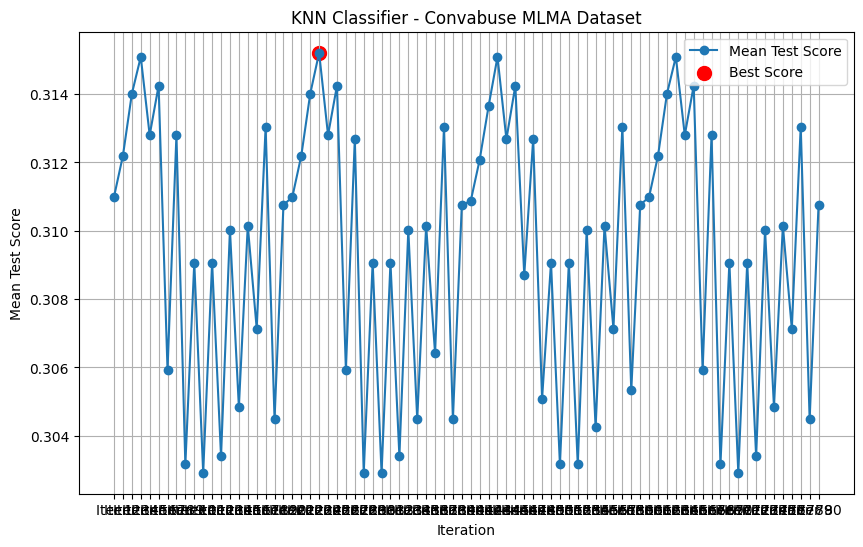

In [35]:
# Plot the accuracy scores for the KNN Classifier on the Convabuse MLMA dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(convabuse_mlma_knn_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
convabuse_mlma_knn_best_score_index = np.argmax(convabuse_mlma_knn_grid_search.cv_results_['mean_test_score'])
plt.scatter(convabuse_mlma_knn_best_score_index, convabuse_mlma_knn_grid_search.cv_results_['mean_test_score'][convabuse_mlma_knn_best_score_index], color='red', s=100, label='Best Score')

plt.title('KNN Classifier - Convabuse MLMA Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(convabuse_mlma_knn_grid_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(convabuse_mlma_knn_grid_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [36]:
# Predict on the test set
convabuse_mlma_knn_y_pred = convabuse_mlma_knn_grid_search.predict(convabuse_mlma_X_test)

In [37]:
# Evaluate the model
convabuse_mlma_knn_accuracy = accuracy_score(convabuse_mlma_y_test, convabuse_mlma_knn_y_pred)
convabuse_mlma_knn_f1 = f1_score(convabuse_mlma_y_test, convabuse_mlma_knn_y_pred, average='weighted')

print("Convabuse MLMA KNN Classifier:")
print(f"Best Parameters: {convabuse_mlma_knn_grid_search.best_params_}")
print(f"Accuracy: {convabuse_mlma_knn_accuracy:.4f}")
print(f"F1 Score: {convabuse_mlma_knn_f1:.4f}")

Convabuse MLMA KNN Classifier:
Best Parameters: {'knn_classifier__metric': 'manhattan', 'knn_classifier__n_neighbors': 166, 'knn_classifier__weights': 'distance'}
Accuracy: 0.3178
F1 Score: 0.2868


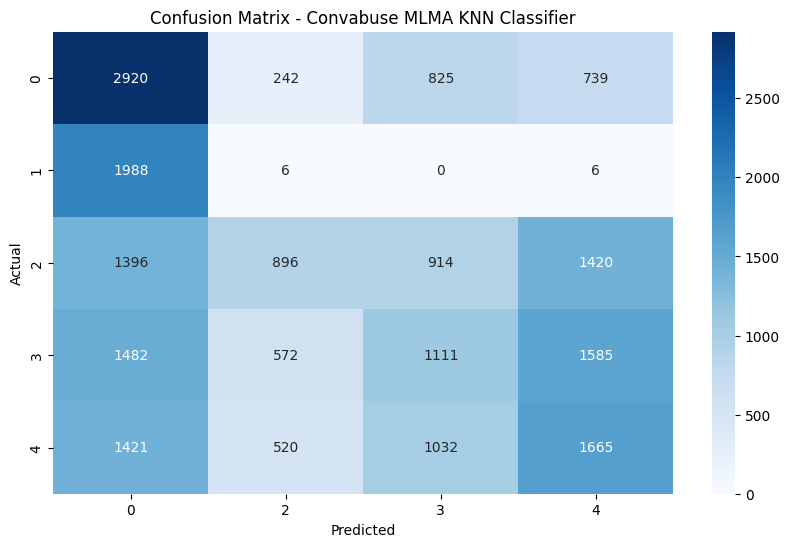

In [38]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_mlma_y_test, convabuse_mlma_knn_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Convabuse MLMA KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
# Generate a classification report for the KNN Classifier on the Convabuse MLMA dataset
convabuse_mlma_knn_report = classification_report(convabuse_mlma_y_test, convabuse_mlma_knn_y_pred)
print("Classification Report for Convabuse MLMA KNN Classifier:")
print(convabuse_mlma_knn_report)

Classification Report for Convabuse MLMA KNN Classifier:
              precision    recall  f1-score   support

           0       0.32      0.62      0.42      4726
           1       0.00      0.00      0.00      2000
           2       0.40      0.19      0.26      4626
           3       0.29      0.23      0.26      4750
           4       0.31      0.36      0.33      4638

    accuracy                           0.32     20740
   macro avg       0.26      0.28      0.25     20740
weighted avg       0.30      0.32      0.29     20740



In [40]:
# Append details to the results list
knn_classification_results_list.append((
    "K-Nearest Neighbors",
    "Convabuse MLMA",
    "NA",
    "NA",
    convabuse_mlma_knn_accuracy,
    convabuse_mlma_knn_f1,
    0.0,
    convabuse_mlma_knn_grid_search.best_params_
))

# Convabuse MLMA Gradient Boosting

In [41]:
gb_classification_results_list = []

In [42]:
convabuse_mlma_y_test.value_counts()

abuse_level
3    4750
0    4726
4    4638
2    4626
1    2000
Name: count, dtype: int64

In [43]:
convabuse_mlma_X_sample_split_count = int(len(convabuse_mlma_X_sample) * 0.1)
convabuse_mlma_X_sample_split_count

1037

In [44]:
# Create a pipeline for the Gradient Boosting Classifier for the Convabuse dataset optimized for accuracy
convabuse_mlma_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])

# Define the parameter grid for GridSearchCV
convabuse_mlma_param_grid = {
    'gb__n_estimators': range(1, 100),
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, convabuse_mlma_sample_log2),
    'gb__min_samples_leaf': [convabuse_mlma_X_sample_split_count]
}

# Create a GridSearchCV object
convabuse_mlma_gb_grid_search = GridSearchCV(
    convabuse_mlma_gb_pipeline, 
    convabuse_mlma_param_grid, 
    cv=convabuse_mlma_kf, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

In [45]:
# Fit the model
convabuse_mlma_gb_grid_search.fit(convabuse_mlma_X_sample_train, convabuse_mlma_y_sample_train)

Fitting 5 folds for each of 12870 candidates, totalling 64350 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 14),
                         'gb__min_samples_leaf': [1037],
                         'gb__n_estimators': range(1, 100)},
             scoring='accuracy', verbose=1)

In [46]:
# Get the best parameters
convabuse_mlma_gb_best_params = convabuse_mlma_gb_grid_search.best_params_

# Get the best score
convabuse_mlma_gb_best_score = convabuse_mlma_gb_grid_search.best_score_

# Print
print("Best Parameters:", convabuse_mlma_gb_best_params)
print("Best Score:", convabuse_mlma_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.01), 'gb__max_depth': 2, 'gb__min_samples_leaf': 1037, 'gb__n_estimators': 6}
Best Score: 0.2814617602416901


In [47]:
# Pickle the model
with open(f'{pickle_path}convabuse_mlma_gb_model.pkl', 'wb') as f:
    pickle.dump(convabuse_mlma_gb_grid_search, f)

In [48]:
# Import the model
with open(f'{pickle_path}convabuse_mlma_gb_model.pkl', 'rb') as f:
    convabuse_mlma_gb_model = pickle.load(f)

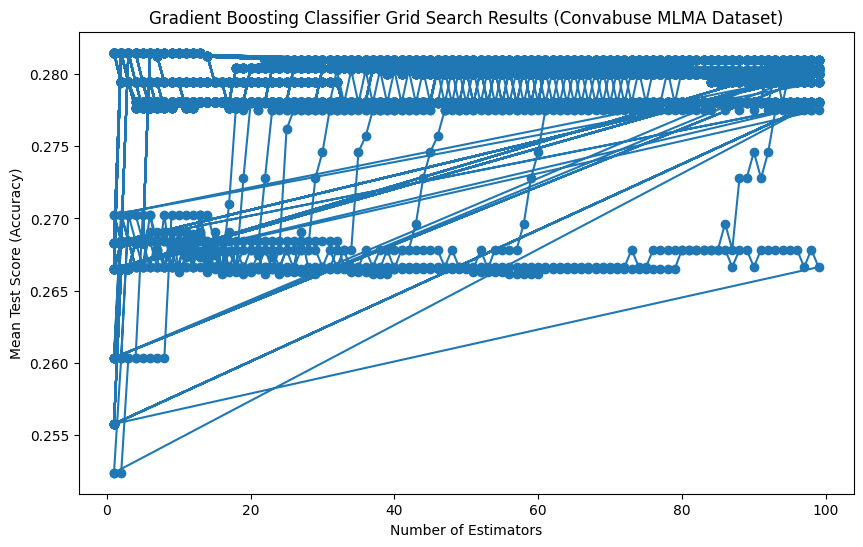

In [49]:
# Plot the grid search results for the Gradient Boosting Classifier on the Convabuse MLMA dataset
convabuse_mlma_gb_results_accuracy = pd.DataFrame(convabuse_mlma_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(convabuse_mlma_gb_results_accuracy['param_gb__n_estimators'], convabuse_mlma_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (Convabuse MLMA Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [50]:
# Use the best estimator to make predictions on the test set
convabuse_mlma_gb_best_estimator = convabuse_mlma_gb_grid_search.best_estimator_
convabuse_mlma_gb_y_pred = convabuse_mlma_gb_best_estimator.predict(convabuse_mlma_X_test)

In [51]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the Convabuse MLMA dataset
convabuse_mlma_gb_accuracy = accuracy_score(convabuse_mlma_y_test, convabuse_mlma_gb_y_pred)
convabuse_mlma_gb_f1 = f1_score(convabuse_mlma_y_test, convabuse_mlma_gb_y_pred, average='weighted')

# Print the results
print(f'Convabuse MLMA Gradient Boosting Classifier Accuracy: {convabuse_mlma_gb_accuracy}')
print(f'Convabuse MLMA Gradient Boosting Classifier F1 Score: {convabuse_mlma_gb_f1}')

Convabuse MLMA Gradient Boosting Classifier Accuracy: 0.28249758919961426
Convabuse MLMA Gradient Boosting Classifier F1 Score: 0.17305179883282418


In [52]:
# Print the classification report for the Gradient Boosting Classifier on the Convabuse MLMA dataset
print("Classification Report for Convabuse MLMA Gradient Boosting Classifier:")
print(classification_report(convabuse_mlma_y_test, convabuse_mlma_gb_y_pred))

Classification Report for Convabuse MLMA Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.28      0.82      0.42      4726
           1       0.00      0.00      0.00      2000
           2       0.00      0.00      0.00      4626
           3       0.28      0.42      0.34      4750
           4       0.00      0.00      0.00      4638

    accuracy                           0.28     20740
   macro avg       0.11      0.25      0.15     20740
weighted avg       0.13      0.28      0.17     20740



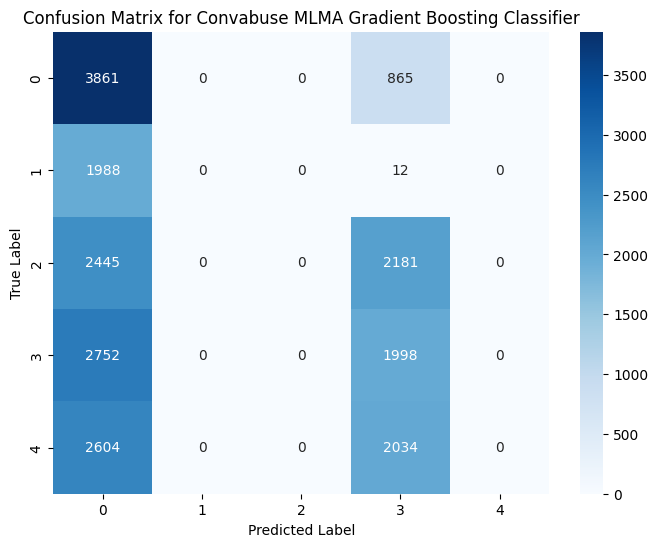

In [53]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the Convabuse MLMA dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(convabuse_mlma_y_test, convabuse_mlma_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse MLMA Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "Convabuse MLMA",
    "NA",
    "NA",
    convabuse_mlma_gb_accuracy,
    convabuse_mlma_gb_f1,
    0.0,
    convabuse_mlma_gb_grid_search.best_params_
))

# Convabuse MLMA K-Means Clustering

In [55]:
kmeans_clustering_results_list = []

In [56]:
def calculate_kmeans_scores_p1(dataset, X, kmeans_params):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=1000, random_state=42)

    inertia_list = []
    silhouette_list = []

    for n in kmeans_params['n_clusters']:
        print(f"Running KMeans with n_clusters={n}")
        minibatch_kmeans.set_params(n_clusters=n)
        minibatch_kmeans.fit(X)
        inertia_list.append(minibatch_kmeans.inertia_)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, minibatch_kmeans.labels_)
        silhouette_list.append(silhouette_avg)

    # Get the smallest inertia value and its index
    print(f"Smallest inertia value: {np.min(inertia_list)} at index {np.argmin(inertia_list)}")
    # Get the best silhouette score and its index
    print(f"Best silhouette score: {np.min(silhouette_list)} at index {np.argmax(silhouette_list)}")

    # Plot the inertia and silhouette scores
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(kmeans_params['n_clusters'], inertia_list, marker='o')
    # Plot a red x at the chosen number of clusters
    chosen_clusters = np.argmax(silhouette_list) + 2
    chosen_clusters_index = kmeans_params['n_clusters'].index(chosen_clusters)
    plt.plot(chosen_clusters_index + 2, inertia_list[chosen_clusters_index], 'rx', markersize=10, label=f'Cluster: {chosen_clusters}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 1:\nInertia vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(kmeans_params['n_clusters'], silhouette_list, marker='o', color='orange')
    # Plot a red x at the chosen number of clusters
    plt.plot(chosen_clusters_index + 2, silhouette_list[chosen_clusters_index], 'rx', markersize=10, label=f'Cluster: {chosen_clusters}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 1:\nSilhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.tight_layout()
    plt.show()

    return inertia_list, silhouette_list, chosen_clusters

In [57]:
def calculate_kmeans_scores_p2(dataset, X, kmeans_params, chosen_clusters):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=int(chosen_clusters), batch_size=1000, random_state=42)

    # Use a manual for loop to iterate through only the init, max_iter, and n_init parameters to find the best K-Means clustering model for the US Accidents dataset optimized for accuracy
    kmeans_best_score_p2 = 0
    kmeans_best_model_p2 = None
    kmeans_best_params_p2 = None
    kmeans_inertia_p2 = []
    kmeans_silhouette_scores_p2 = []
    for init in kmeans_params['init']:
        for max_iter in kmeans_params['max_iter']:
            for n_init in kmeans_params['n_init']:
                print(f"Running KMeans with n_clusters={int(chosen_clusters)}, init={init}, max_iter={max_iter}, n_init={n_init}")
                minibatch_kmeans.set_params(n_clusters=int(chosen_clusters), init=init, max_iter=max_iter, n_init=n_init)
                minibatch_kmeans.fit(X)
                kmeans_inertia_p2.append(minibatch_kmeans.inertia_)
                
                # Calculate silhouette score
                silhouette_avg = silhouette_score(X, minibatch_kmeans.labels_)
                kmeans_silhouette_scores_p2.append(silhouette_avg)
                
                # Check if this model is better than the previous best
                if silhouette_avg > kmeans_best_score_p2:
                    kmeans_best_score_p2 = silhouette_avg
                    kmeans_best_model_p2 = minibatch_kmeans
                    kmeans_best_params_p2 = {
                        'init': init,
                        'max_iter': max_iter,
                        'n_init': n_init
                    }

    # Get the smallest inertia value and its index
    print(f"Smallest inertia value: {np.min(kmeans_inertia_p2)} at index {np.argmin(kmeans_inertia_p2)}")
    # Get the best silhouette score and its index
    print(f"Best silhouette score: {np.min(kmeans_silhouette_scores_p2)} at index {np.argmax(kmeans_silhouette_scores_p2)}")

    # Plot the inertia and silhouette scores
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(kmeans_inertia_p2, marker='o')
    # Plot a red x at the best inertia point
    plt.plot(np.argmin(kmeans_inertia_p2), kmeans_inertia_p2[np.argmin(kmeans_inertia_p2)], 'rx', markersize=10, label=f'Iteration: {np.argmin(kmeans_inertia_p2) + 1}, Best Inertia: {kmeans_inertia_p2[np.argmin(kmeans_inertia_p2)]}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 2: Inertia Per Grid Search Iteration (Optimized)')
    plt.xlabel('Iteration')    
    plt.ylabel('Inertia')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(kmeans_silhouette_scores_p2, marker='o', color='orange')
    # Plot a red x at the best silhouette score point
    plt.plot(np.argmax(kmeans_silhouette_scores_p2), kmeans_silhouette_scores_p2[np.argmax(kmeans_silhouette_scores_p2)], 'rx', markersize=10, label=f'Iteration: {np.argmax(kmeans_silhouette_scores_p2) + 1}, Best Silhouette Score: {kmeans_silhouette_scores_p2[np.argmax(kmeans_silhouette_scores_p2)]}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 2: Silhouette Score Per Grid Search Iteration (Optimized)')
    plt.xlabel('Iteration')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.tight_layout()
    plt.show()

    return kmeans_inertia_p2, kmeans_silhouette_scores_p2, kmeans_best_score_p2, kmeans_best_params_p2

In [58]:
def best_kmeans_model(dataset, X_train, X_test, best_kmeans_model_params, chosen_clusters):
    # Use the best K-Means clustering model for the US Accidents dataset to predict the clusters
    kmeans_best_model = MiniBatchKMeans().set_params(**best_kmeans_model_params)
    kmeans_best_model.fit(X_train)
    kmeans_best_model_y_pred = kmeans_best_model.predict(X_test)

    # Predict using only chosen clusters without the other parameters
    kmeans_chosen = MiniBatchKMeans(n_clusters=int(chosen_clusters), random_state=42)
    kmeans_chosen.fit(X_train)
    kmeans_chosen_model_y_pred = kmeans_chosen.predict(X_test)

    best_silhouette_score = silhouette_score(X_test, kmeans_best_model_y_pred)
    best_inertia = kmeans_best_model.inertia_
    chosen_silhouette_score = silhouette_score(X_test, kmeans_chosen_model_y_pred)
    chosen_inertia = kmeans_chosen.inertia_

    print(f"Best Model Silhouette Score: {best_silhouette_score:.4f}")
    print(f"Best Model Inertia: {best_inertia:.4f}")
    print(f"Chosen Clusters Silhouette Score: {chosen_silhouette_score:.4f}")
    print(f"Chosen Clusters Inertia: {chosen_inertia:.4f}")

    # Plot the clusters for the US Accidents dataset using the best K-Means clustering model
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans_best_model_y_pred, cmap='viridis', s=10)
    plt.title(f'{dataset} Clusters using Best K-Means Model')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()

    # Plot a box plot for the clusters of the US Accidents dataset using the best K-Means clustering model
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=kmeans_best_model_y_pred, y=X_test.iloc[:, 0], palette='Set3', hue=kmeans_best_model_y_pred)
    plt.title(f'Box Plot of {dataset} Clusters using Best K-Means Model')
    plt.xlabel('Cluster Label')
    plt.ylabel('Feature 1 (Standardized)')
    plt.grid()
    plt.show()

    # Plot the clusters for the US Accidents dataset using the best K-Means clustering model
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans_chosen_model_y_pred, cmap='viridis', s=10)
    plt.title(f'{dataset} Clusters using {chosen_clusters} Clusters K-Means Model')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()

    # Plot a box plot for the clusters of the US Accidents dataset using the 6 clusters K-Means model
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=kmeans_chosen_model_y_pred, y=X_test.iloc[:, 0], palette='Set3', hue=kmeans_chosen_model_y_pred)
    plt.title(f'Box Plot of {dataset} Clusters using {chosen_clusters} Clusters K-Means Model')
    plt.xlabel('Cluster Label')
    plt.ylabel('Feature 1 (Standardized)')
    plt.grid()
    plt.show()

    return best_silhouette_score, best_inertia, chosen_silhouette_score, chosen_inertia

In [59]:
convabuse_mlma_kmeans_params = {
    'n_clusters': range(2, 20), # Number of clusters to try
    'init': ['k-means++'],   # Initialization method
    'max_iter': range(1, 100),   # Maximum number of iterations
    'n_init': range(1, 30)
}

Running KMeans with n_clusters=2


  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session

Running KMeans with n_clusters=3
Running KMeans with n_clusters=4
Running KMeans with n_clusters=5
Running KMeans with n_clusters=6
Running KMeans with n_clusters=7
Running KMeans with n_clusters=8
Running KMeans with n_clusters=9
Running KMeans with n_clusters=10
Running KMeans with n_clusters=11
Running KMeans with n_clusters=12
Running KMeans with n_clusters=13
Running KMeans with n_clusters=14
Running KMeans with n_clusters=15
Running KMeans with n_clusters=16
Running KMeans with n_clusters=17
Running KMeans with n_clusters=18
Running KMeans with n_clusters=19
Smallest inertia value: 301.1411558560328 at index 15
Best silhouette score: 0.4890343082958671 at index 15


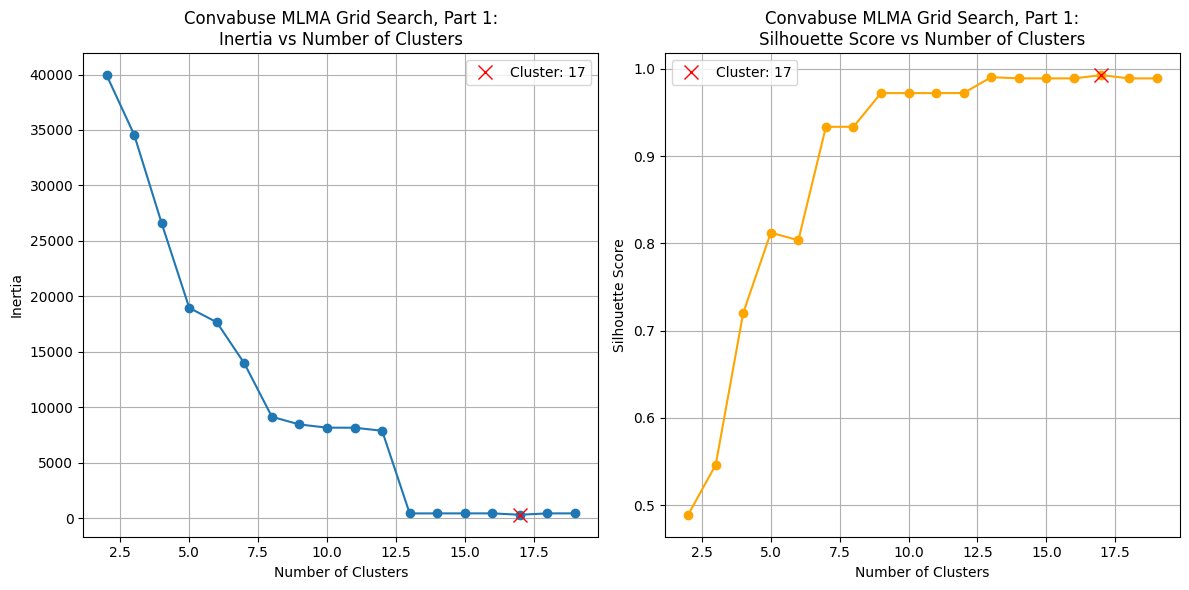

In [60]:
# Calculate the scores for the Convabuse MLMA dataset
minibatch_convabuse_mlma_inertia_list_p1, minibatch_convabuse_mlma_silhouette_list_p1, minibatch_convabuse_mlma_chosen_clusters_p1 = calculate_kmeans_scores_p1("Convabuse MLMA", convabuse_mlma_X_sample_train, convabuse_mlma_kmeans_params)

Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=1
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=2
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=3
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=4
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=5
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=6
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=7
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=8
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=9
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=10
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=11
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=12
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=13
Running KMeans with n_clusters=17, init=k-means++, max_iter=

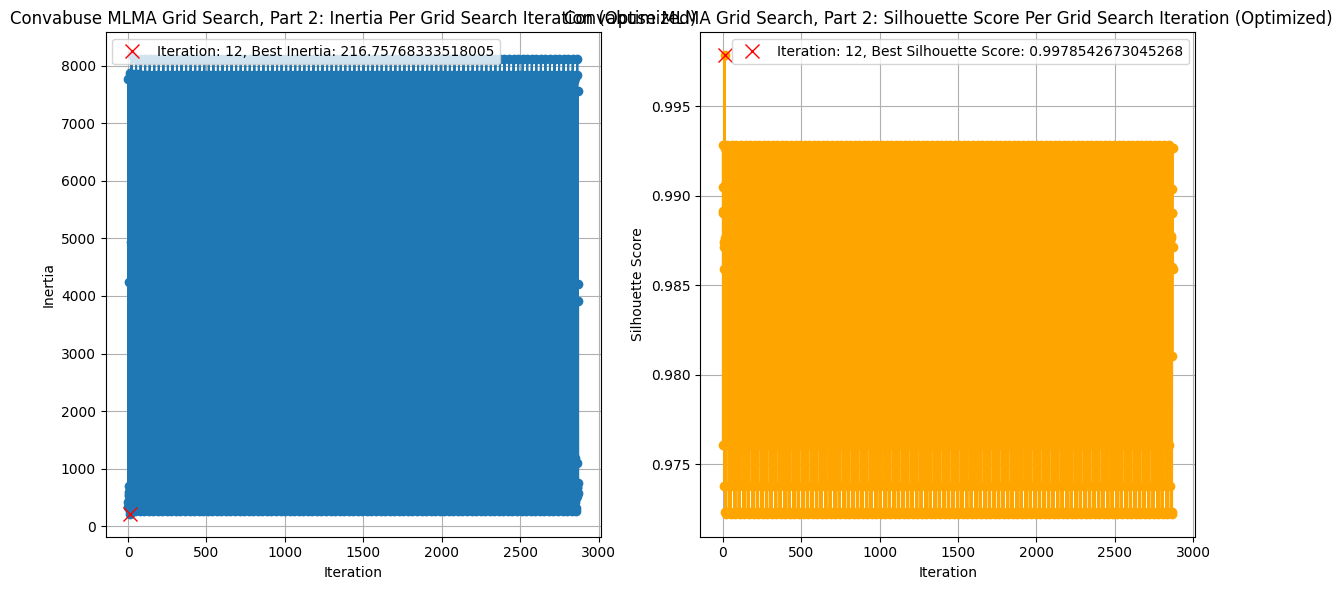

In [61]:
# Calculate the scores for the Convabuse dataset
minibatch_convabuse_mlma_inertia_list_p2, minibatch_convabuse_mlma_silhouette_list_p2, minibatch_convabuse_mlma_best_score_p2, minibatch_convabuse_mlma_best_params_p2 = calculate_kmeans_scores_p2("Convabuse MLMA", convabuse_mlma_X_sample_train, convabuse_mlma_kmeans_params, minibatch_convabuse_mlma_chosen_clusters_p1)

Best Model Silhouette Score: 0.9457
Best Model Inertia: 1667.7452
Chosen Clusters Silhouette Score: 0.9871
Chosen Clusters Inertia: 423.5976


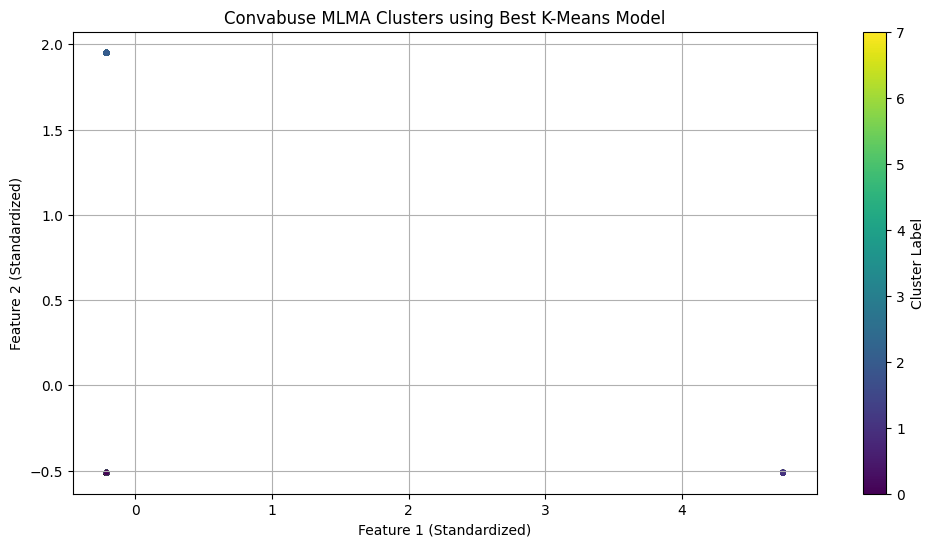

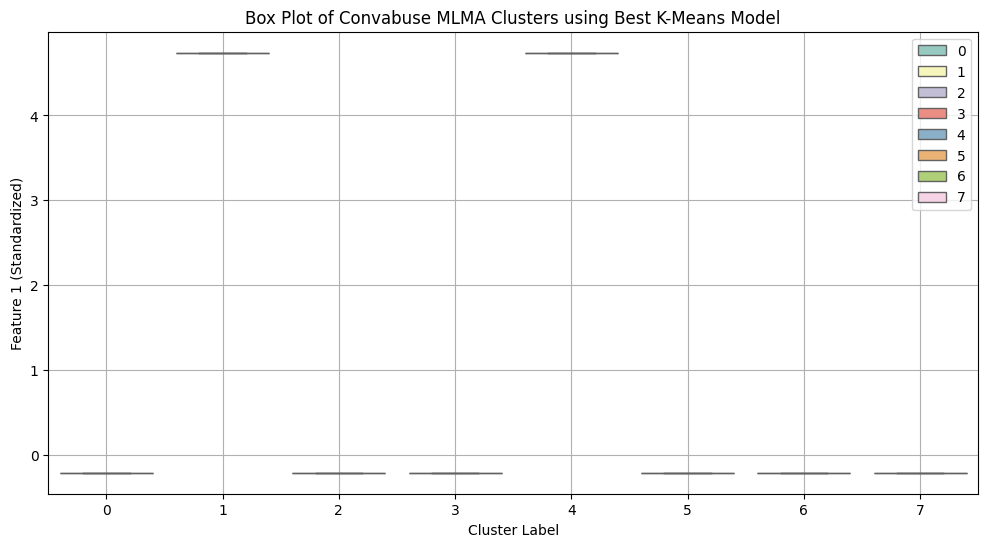

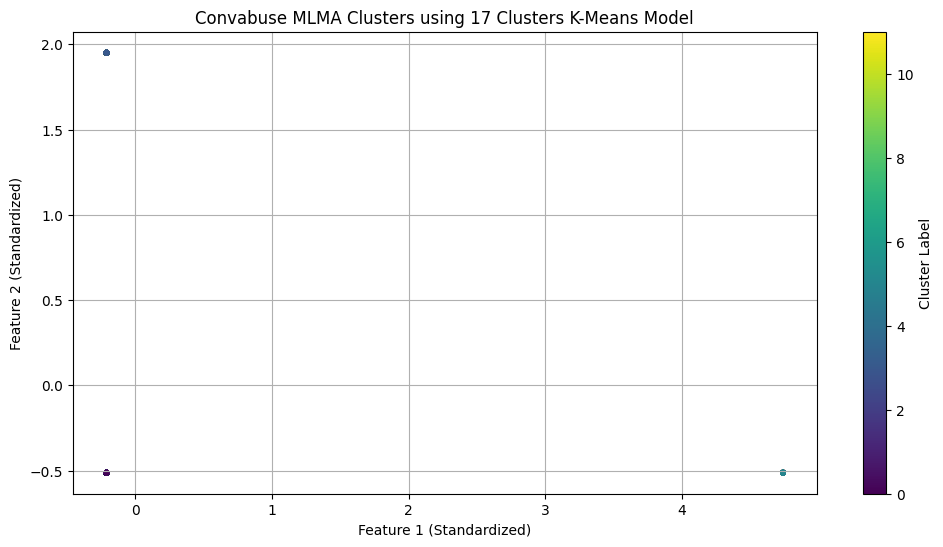

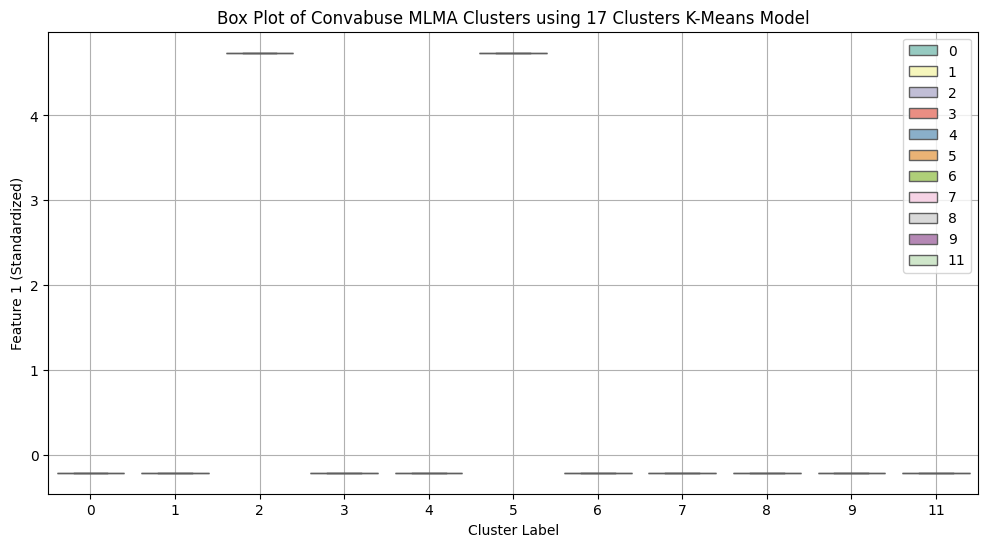

In [62]:
minibatch_convabuse_mlma_best_model_silhouette_score, minibatch_convabuse_mlma_best_model_inertia, minibatch_convabuse_mlma_chosen_model_silhouette_score, minibatch_convabuse_mlma_chosen_model_inertia = best_kmeans_model("Convabuse MLMA", convabuse_mlma_X_sample_train, convabuse_mlma_X_sample_test, minibatch_convabuse_mlma_best_params_p2, minibatch_convabuse_mlma_chosen_clusters_p1)

In [63]:
# Collect all relevant values
kmeans_clustering_results_list.append(["Convabuse MLMA", 
        minibatch_convabuse_mlma_best_model_silhouette_score, 
        minibatch_convabuse_mlma_best_model_inertia, 
        minibatch_convabuse_mlma_chosen_model_silhouette_score, 
        minibatch_convabuse_mlma_chosen_model_inertia, 
        minibatch_convabuse_mlma_best_params_p2
])

## Random Forest Classification Results

In [64]:
rf_classification_results_list

[('Random Forest',
  'Convabuse MLMA',
  'NAN',
  'NAN',
  0.3175506268081003,
  0.28668413870134946,
  0.0,
  {'rf_classifier__n_estimators': 958,
   'rf_classifier__min_samples_split': 2490,
   'rf_classifier__min_samples_leaf': 830,
   'rf_classifier__max_depth': 7,
   'rf_classifier__criterion': 'gini'})]

In [65]:
# Import the model 6 rf classification summary results
results_path = 'results/'
results_filename = 'model6_rf-classification-summary.csv'
model_6_rf_classification_summary = pd.read_csv(f"{results_path}/{results_filename}")
model_6_rf_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Random Forest,Convabuse,NaN,NaN,0.332340,0.237801,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."
1,Random Forest,Dynamically Generated Hate Speech,NaN,NaN,0.834871,0.830289,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."
2,Random Forest,US Elections 2020 Hate Speech,NaN,NaN,0.703598,0.702632,0.0,"{'rf_classifier__n_estimators': 795, 'rf_class..."
3,Random Forest,MLMA Hate Speech,NaN,NaN,0.366848,0.350352,0.0,"{'rf_classifier__n_estimators': 860, 'rf_class..."


In [66]:
# Convert the rf_classification_results_list to a DataFrame
rf_classification_summary = pd.DataFrame(rf_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
rf_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Random Forest,Convabuse MLMA,NAN,NAN,0.317551,0.286684,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."


In [67]:
# Concatenate the new results with the existing results
updated_rf_classification_summary = pd.concat([model_6_rf_classification_summary, rf_classification_summary], ignore_index=True)
updated_rf_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Random Forest,Convabuse,NaN,NaN,0.332340,0.237801,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."
1,Random Forest,Dynamically Generated Hate Speech,NaN,NaN,0.834871,0.830289,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."
2,Random Forest,US Elections 2020 Hate Speech,NaN,NaN,0.703598,0.702632,0.0,"{'rf_classifier__n_estimators': 795, 'rf_class..."
3,Random Forest,MLMA Hate Speech,NaN,NaN,0.366848,0.350352,0.0,"{'rf_classifier__n_estimators': 860, 'rf_class..."
4,Random Forest,Convabuse MLMA,NAN,NAN,0.317551,0.286684,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."


In [68]:
updated_rf_classification_summary.to_csv(f"{results_path}/model6_rf-classification-summary.csv", index=False)


## K-Nearest Neighbors Classification Results

In [69]:
knn_classification_results_list

[('K-Nearest Neighbors',
  'Convabuse MLMA',
  'NA',
  'NA',
  0.31783992285438767,
  0.2867887548615415,
  0.0,
  {'knn_classifier__metric': 'manhattan',
   'knn_classifier__n_neighbors': 166,
   'knn_classifier__weights': 'distance'})]

In [71]:
# Import the model 8 knn classification summary results
knn_classification_results = pd.read_csv(f'{results_path}/model8_knn-classification-summary.csv')
knn_classification_results

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,K-Nearest Neighbors,Convabuse,NaN,NaN,0.332340,0.237801,0.0,"{'knn_classifier__metric': 'euclidean', 'knn_c..."
1,K-Nearest Neighbors,Dynamically Generated Hate Speech,NaN,NaN,0.834871,0.830289,0.0,"{'knn_classifier__metric': 'euclidean', 'knn_c..."
2,K-Nearest Neighbors,US Elections 2020 Hate Speech,NaN,NaN,0.703598,0.702632,0.0,"{'knn_classifier__metric': 'euclidean', 'knn_c..."
3,K-Nearest Neighbors,MLMA Hate Speech,NaN,NaN,0.470484,0.464947,0.0,"{'knn_classifier__metric': 'chebyshev', 'knn_c..."


In [72]:
# Convert the knn_classification_results_list to a DataFrame
knn_classification_summary = pd.DataFrame(knn_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
knn_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,K-Nearest Neighbors,Convabuse MLMA,NA,NA,0.31784,0.286789,0.0,"{'knn_classifier__metric': 'manhattan', 'knn_c..."


In [73]:
# Concatenate the new results with the existing results
updated_rf_classification_summary = pd.concat([model_6_rf_classification_summary, rf_classification_summary], ignore_index=True)
updated_rf_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Random Forest,Convabuse,NaN,NaN,0.332340,0.237801,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."
1,Random Forest,Dynamically Generated Hate Speech,NaN,NaN,0.834871,0.830289,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."
2,Random Forest,US Elections 2020 Hate Speech,NaN,NaN,0.703598,0.702632,0.0,"{'rf_classifier__n_estimators': 795, 'rf_class..."
3,Random Forest,MLMA Hate Speech,NaN,NaN,0.366848,0.350352,0.0,"{'rf_classifier__n_estimators': 860, 'rf_class..."
4,Random Forest,Convabuse MLMA,NAN,NAN,0.317551,0.286684,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."


In [74]:
updated_rf_classification_summary.to_csv(f"{results_path}/model8_knn-classification-summary.csv", index=False)

## Gradient Boosting Classification Results

In [75]:
gb_classification_results_list

[('Gradient Boosting',
  'Convabuse MLMA',
  'NA',
  'NA',
  0.28249758919961426,
  0.17305179883282418,
  0.0,
  {'gb__learning_rate': np.float64(0.01),
   'gb__max_depth': 2,
   'gb__min_samples_leaf': 1037,
   'gb__n_estimators': 6})]

In [76]:
# Import the model 9 gb classification summary results
gb_classification_results = pd.read_csv(f'{results_path}/model9_gb-classification-summary.csv')
gb_classification_results

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Gradient Boosting,Convabuse,NaN,NaN,0.280195,0.156045,0.0,"{'gb__learning_rate': np.float64(0.01), 'gb__m..."
1,Gradient Boosting,Dynamically Generated Hate Speech,NaN,NaN,0.834871,0.830289,0.0,"{'gb__learning_rate': np.float64(0.01), 'gb__m..."
2,Gradient Boosting,US Elections 2020 Hate Speech,NaN,NaN,0.671402,0.671325,0.0,{'gb__learning_rate': np.float64(0.02000000000...
3,Gradient Boosting,MLMA Hate Speech,NaN,NaN,0.324213,0.320280,0.0,"{'gb__learning_rate': np.float64(0.1), 'gb__ma..."


In [77]:
# Convert the gb_classification_results_list to a DataFrame
gb_classification_summary = pd.DataFrame(gb_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
gb_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Gradient Boosting,Convabuse MLMA,NA,NA,0.282498,0.173052,0.0,"{'gb__learning_rate': 0.01, 'gb__max_depth': 2..."


In [78]:
# Concatenate the new results with the existing results
updated_gb_classification_summary = pd.concat([gb_classification_results, gb_classification_summary], ignore_index=True)
updated_gb_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Gradient Boosting,Convabuse,NaN,NaN,0.280195,0.156045,0.0,"{'gb__learning_rate': np.float64(0.01), 'gb__m..."
1,Gradient Boosting,Dynamically Generated Hate Speech,NaN,NaN,0.834871,0.830289,0.0,"{'gb__learning_rate': np.float64(0.01), 'gb__m..."
2,Gradient Boosting,US Elections 2020 Hate Speech,NaN,NaN,0.671402,0.671325,0.0,{'gb__learning_rate': np.float64(0.02000000000...
3,Gradient Boosting,MLMA Hate Speech,NaN,NaN,0.324213,0.320280,0.0,"{'gb__learning_rate': np.float64(0.1), 'gb__ma..."
4,Gradient Boosting,Convabuse MLMA,NA,NA,0.282498,0.173052,0.0,"{'gb__learning_rate': 0.01, 'gb__max_depth': 2..."


In [79]:
updated_gb_classification_summary.to_csv(f"{results_path}/model9_gb-classification-summary.csv", index=False)

## K-Means Clustering Results

In [80]:
kmeans_clustering_results_list

[['Convabuse MLMA',
  np.float64(0.9456937870204695),
  1667.7452051765497,
  np.float64(0.9871027703721291),
  423.5976477091451,
  {'init': 'k-means++', 'max_iter': 1, 'n_init': 12}]]

In [81]:
# Import the model 10 kmeans clustering summary results
kmeans_clustering_results = pd.read_csv(f'{results_path}/model10_kmeans-clustering-summary.csv')
kmeans_clustering_results

,Dataset,Best Model Silhouette Score,Best Model Inertia,Chosen Model Silhouette Score,Chosen Model Inertia,Best Parameters
0,Convabuse,1.000000,4.843082e-28,1.000000,2.356035e-25,"{'init': 'k-means++', 'max_iter': 1, 'n_init': 1}"
1,Dynamically Generated Hate Speech,0.843802,1.681314e+03,0.998788,2.194413e+01,"{'init': 'k-means++', 'max_iter': 1, 'n_init': 8}"
2,US Elections 2020 Hate Speech,0.525683,9.737502e-31,0.525683,3.342490e-29,"{'init': 'k-means++', 'max_iter': 1, 'n_init': 1}"
3,MLMA Hate Speech,0.140590,3.301793e+03,0.148910,2.286093e+03,"{'init': 'k-means++', 'max_iter': 13, 'n_init'..."


In [82]:
# Convert the kmeans_clustering_results_list to a DataFrame
kmeans_clustering_summary = pd.DataFrame(kmeans_clustering_results_list, columns=["Dataset", "Best Silhouette Score", "Best Inertia", "Chosen Silhouette Score", "Chosen Inertia", "Best Parameters"])
kmeans_clustering_summary

,Dataset,Best Silhouette Score,Best Inertia,Chosen Silhouette Score,Chosen Inertia,Best Parameters
0,Convabuse MLMA,0.945694,1667.745205,0.987103,423.597648,"{'init': 'k-means++', 'max_iter': 1, 'n_init':..."


In [ ]:
# # Rename the columns to match the existing dataframe
# kmeans_clustering_summary.rename(columns={
#     'Best Silhouette Score': 'Best Model Silhouette Score',
#     'Best Model Inertia': 'Best Model Inertia',
#     'Chosen Silhouette Score': 'Chosen Model Silhouette Score',
#     'Chosen Inertia': 'Chosen Model Inertia'
# }, inplace=True)

In [ ]:
# kmeans_clustering_summary.rename(columns={'Best Inertia': 'Best Model Inertia'}, inplace=True)

In [90]:
# Concatenate the new results with the existing results
updated_kmeans_clustering_summary = pd.concat([kmeans_clustering_results, kmeans_clustering_summary], ignore_index=True)
updated_kmeans_clustering_summary

,Dataset,Best Model Silhouette Score,Best Model Inertia,Chosen Model Silhouette Score,Chosen Model Inertia,Best Parameters
0,Convabuse,1.000000,4.843082e-28,1.000000,2.356035e-25,"{'init': 'k-means++', 'max_iter': 1, 'n_init': 1}"
1,Dynamically Generated Hate Speech,0.843802,1.681314e+03,0.998788,2.194413e+01,"{'init': 'k-means++', 'max_iter': 1, 'n_init': 8}"
2,US Elections 2020 Hate Speech,0.525683,9.737502e-31,0.525683,3.342490e-29,"{'init': 'k-means++', 'max_iter': 1, 'n_init': 1}"
3,MLMA Hate Speech,0.140590,3.301793e+03,0.148910,2.286093e+03,"{'init': 'k-means++', 'max_iter': 13, 'n_init'..."
4,Convabuse MLMA,0.945694,1.667745e+03,0.987103,4.235976e+02,"{'init': 'k-means++', 'max_iter': 1, 'n_init':..."


In [91]:
updated_kmeans_clustering_summary.to_csv(f"{results_path}/model10_kmeans-clustering-summary.csv", index=False)